In [2]:
!pip install tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Install PIL
!pip install pillow

# Resize images script
import os
from PIL import Image

def resize_images(base_path, target_size=(224, 224)):
    folders = ['train', 'test', 'valid']
    for folder in folders:
        folder_path = os.path.join(base_path, folder)
        for class_folder in os.listdir(folder_path):
            class_folder_path = os.path.join(folder_path, class_folder)
            if os.path.isdir(class_folder_path):
                for img_name in os.listdir(class_folder_path):
                    img_path = os.path.join(class_folder_path, img_name)
                    try:
                        with Image.open(img_path) as img:
                            img = img.resize(target_size, Image.ANTIALIAS)
                            img.save(img_path)
                            print(f"Resized {img_path}")
                    except Exception as e:
                        print(f"Error processing {img_path}: {e}")

# Define the base path to your dataset
base_path = '/content/drive/My Drive/Characters/platecharacters'

# Call the resize function
resize_images(base_path, target_size=(224, 224))


<ipython-input-4-d472722b8249>:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02271.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02283.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02243.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02308.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02265.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02239.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02289.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/3_DSC02254.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/1_DSC02287.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/3_DSC02252.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/0_DSC02193.JPG
Resized /content/drive/My Drive/Characters/platecharacters/train/1/4_DSC02232.JPG
Resized /content

In [5]:
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator

In [6]:
batch_size=32
#Data Augumentation
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen=ImageDataGenerator(
    rescale=1./255
)


In [7]:
train_generator=train_datagen.flow_from_directory(
  '/content/drive/MyDrive/Characters/platecharacters/train',
  target_size=(224,224),
  batch_size=batch_size,
  class_mode='categorical'
)

validation_generator=test_datagen.flow_from_directory(
 '/content/drive/MyDrive/Characters/platecharacters/valid',
 target_size=(224,224),
 batch_size=batch_size,
 class_mode='categorical'
)

Found 2644 images belonging to 17 classes.
Found 462 images belonging to 17 classes.


In [8]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from keras.models import Sequential
from keras.layers import Dropout,BatchNormalization

In [11]:
model=Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 512)         2048      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                        

In [13]:
conv_base.trainable=False

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history=model.fit_generator(
    train_generator, epochs=100, validation_data=validation_generator,
)

<ipython-input-15-52ebca9cc836>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/75
83/83 [==============================] - 69s 774ms/step - loss: 2.8700 - accuracy: 0.1241 - val_loss: 2.8021 - val_accuracy: 0.1494
Epoch 2/75
83/83 [==============================] - 49s 584ms/step - loss: 2.7690 - accuracy: 0.1388 - val_loss: 2.6142 - val_accuracy: 0.1667
Epoch 3/75
83/83 [==============================] - 48s 576ms/step - loss: 2.7784 - accuracy: 0.1483 - val_loss: 2.6199 - val_accuracy: 0.1580
Epoch 4/75
83/83 [==============================] - 48s 581ms/step - loss: 2.7074 - accuracy: 0.1623 - val_loss: 2.5911 - val_accuracy: 0.1970
Epoch 5/75
83/83 [==============================] - 46s 560ms/step - loss: 2.6896 - accuracy: 0.1675 - val_loss: 2.4135 - val_accuracy: 0.2424
Epoch 6/75
83/83 [==============================] - 47s 567ms/step - loss: 2.5788 - accuracy: 0.1970 - val_loss: 2.2249 - val_accuracy: 0.2922
Epoch 7/75
83/83 [==============================] - 48s 581ms/step - loss: 2.5636 - accuracy: 0.2020 - val_loss: 2.2474 - val_accuracy: 0.2922

In [2]:
model.save('/content/drive/MyDrive/Characters/platecharacters/plate.h5')

NameError: name 'model' is not defined

1/1 [==============================] - 1s 1s/step


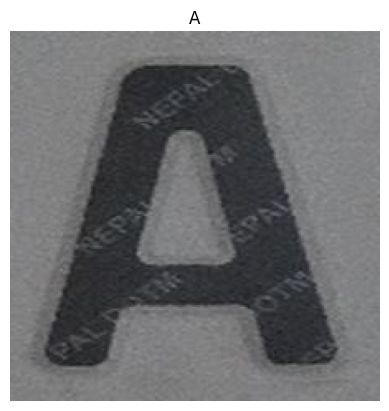

In [17]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your trained MobileNet model
model = load_model('/content/drive/MyDrive/Characters/platecharacters/OCR.h5')

# Preprocess new license plate images
img_path = '/content/drive/MyDrive/Characters/platecharacters/valid/A/validdataA (1).JPG'
img = image.load_img(img_path, target_size=(224,224))  # Adjust target_size as needed
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize pixel values

# Make predictions
preds = model.predict(x)

# Interpret predictions for 17 classes
class_labels = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','H']  # Update with your class labels
predicted_class_index = np.argmax(preds, axis=1)[0]
predicted_label = class_labels[predicted_class_index]

# Plot the image with the predicted label
plt.imshow(img)
plt.axis('off')
plt.title(predicted_label)
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.models import load_model

# Load your trained CNN model
model = load_model('/content/drive/MyDrive/Characters/platecharacters/OCR.h5')

# Define the directory containing your test dataset
test_dir = '/content/drive/MyDrive/Characters/platecharacters/train'

# Initialize lists to store image paths and corresponding labels
image_paths = []
labels = []




# Traverse the test dataset directory to collect image paths and labels
for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image_paths.append(image_path)
            labels.append(class_name)

# Preprocess images and make predictions
test_data = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224,224))  # Resize image if necessary
    img = img / 255.0  # Normalize pixel values
    test_data.append(img)

test_data = np.array(test_data)

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)  # Convert softmax probabilities to class labels

# Initialize a dictionary to map class names to numerical indices
class_to_index = {class_name: index for index, class_name in enumerate(class_labels)}

# Convert class names in labels to numerical indices using the dictionary
numerical_labels = [class_to_index[label] for label in labels]

# Calculate the confusion matrix using numerical labels and predicted labels
conf_matrix = confusion_matrix(numerical_labels, predicted_labels)



# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.show()



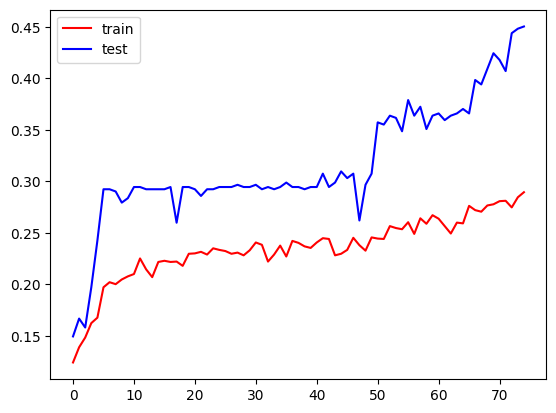

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()


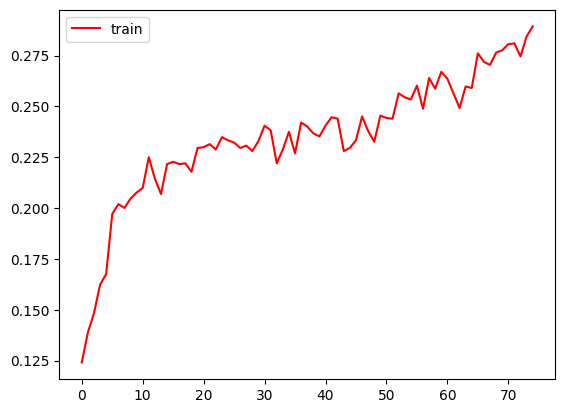

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.legend()
plt.show()

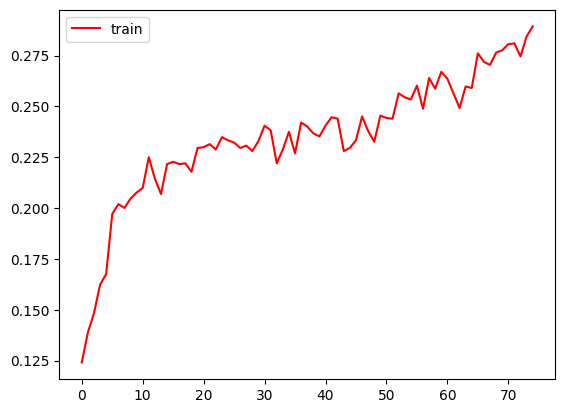

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.legend()
plt.show()

In [22]:
import numpy as np
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.models import load_model

# Load your trained CNN model
model = load_model('/content/drive/MyDrive/Characters/platecharacters/OCR.h5')

# Define the directory containing your test dataset
test_dir = '/content/drive/MyDrive/Characters/platecharacters/test'

# Initialize lists to store image paths and corresponding labels
image_paths = []
labels = []




# Traverse the test dataset directory to collect image paths and labels
for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image_paths.append(image_path)
            labels.append(class_name)

# Preprocess images and make predictions
test_data = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224,224))  # Resize image if necessary
    img = img / 255.0  # Normalize pixel values
    test_data.append(img)

test_data = np.array(test_data)

# Make predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)  # Convert softmax probabilities to class labels

# Initialize a dictionary to map class names to numerical indices
class_to_index = {class_name: index for index, class_name in enumerate(class_labels)}

# Convert class names in labels to numerical indices using the dictionary
numerical_labels = [class_to_index[label] for label in labels]

# Calculate the confusion matrix using numerical labels and predicted labels
conf_matrix = confusion_matrix(numerical_labels, predicted_labels)


# Example confusion matrix for 17 classes
# Note: This is just a sample. Replace it with your actual confusion matrix.
conf_matrix = np.random.randint(0, 10, size=(17, 17))

# Number of classes
num_classes = conf_matrix.shape[0]

# Initialize arrays to store Type I and Type II errors for each class
type1_errors = np.zeros(num_classes, dtype=int)
type2_errors = np.zeros(num_classes, dtype=int)

for i in range(num_classes):
    # True Positive for class i
    TP = conf_matrix[i, i]

    # False Positive for class i: sum of the column for class i, excluding TP
    FP = conf_matrix[:, i].sum() - TP

    # False Negative for class i: sum of the row for class i, excluding TP
    FN = conf_matrix[i, :].sum() - TP

    type1_errors[i] = FP
    type2_errors[i] = FN

# Display the results
for i in range(num_classes):
    print(f"Class {i}:")
    print(f"  Type I Error (False Positive): {type1_errors[i]}")
    print(f"  Type II Error (False Negative): {type2_errors[i]}")


41/41 [==============================] - 8s 187ms/step
Class 0:
  Type I Error (False Positive): 90
  Type II Error (False Negative): 55
Class 1:
  Type I Error (False Positive): 64
  Type II Error (False Negative): 69
Class 2:
  Type I Error (False Positive): 60
  Type II Error (False Negative): 67
Class 3:
  Type I Error (False Positive): 66
  Type II Error (False Negative): 63
Class 4:
  Type I Error (False Positive): 68
  Type II Error (False Negative): 68
Class 5:
  Type I Error (False Positive): 86
  Type II Error (False Negative): 71
Class 6:
  Type I Error (False Positive): 90
  Type II Error (False Negative): 91
Class 7:
  Type I Error (False Positive): 66
  Type II Error (False Negative): 82
Class 8:
  Type I Error (False Positive): 58
  Type II Error (False Negative): 73
Class 9:
  Type I Error (False Positive): 61
  Type II Error (False Negative): 66
Class 10:
  Type I Error (False Positive): 77
  Type II Error (False Negative): 87
Class 11:
  Type I Error (False Positive):